# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [7]:
model1.score(X_train,y_train)

0.7678535498891762

In [8]:
model1.score(X_valid,y_valid)

0.6304876253088009

# 5. Ridge Regularization for Linear Model

In [9]:
from sklearn.linear_model import Ridge

model2 = Ridge(alpha=10)
model2.fit(X_train, y_train)

Ridge(alpha=10)

In [10]:
model2.score(X_train,y_train)

0.7591975620449859

In [11]:
model2.score(X_valid,y_valid)

0.6214542796076307

# 6. Lasso Regularization for Linear Model

In [12]:
from sklearn.linear_model import Lasso

model3 = Lasso(alpha=0.1)
model3.fit(X_train, y_train)

Lasso(alpha=0.1)

In [13]:
model3.score(X_train,y_train)

0.7556110769582679

In [14]:
model3.score(X_valid,y_valid)

0.6089383099315098

# 7. Polynomial Regression of degree 2

In [15]:
from sklearn.preprocessing import PolynomialFeatures

model4 = PolynomialFeatures(degree=2)
X_train_poly = model4.fit_transform(X_train)
X_valid_poly = model4.fit_transform(X_valid)


In [16]:
model1 = LinearRegression()
model1.fit(X_train_poly,y_train)
model1.score(X_train_poly,y_train)

0.9343229658302781

In [17]:
model1.score(X_valid_poly,y_valid)

0.8633070229864862

# 8. Ridge Regularization for Polynomial model

In [18]:
model2 = Ridge(alpha=5)
model2.fit(X_train_poly, y_train)
model2.score(X_train_poly,y_train)

0.9278039664480842

In [19]:
model2.score(X_valid_poly,y_valid)

0.7951725588283141

# 9. Lasso Regularization for Polynomial model

In [20]:
model3 = Lasso(alpha=0.6)
model3.fit(X_train_poly, y_train)
model3.score(X_train_poly,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.800e+03, tolerance: 3.301e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.9074418582372547

In [21]:
model3.score(X_valid_poly,y_valid)

0.7796635203519202

# 10. Select K Best

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func=f_regression, k = 7)
x_selected = kb.fit_transform(X_train, y_train)
#x_selected = kb.fit_transform(X_train_poly, y_train)
x_selected[0]

array([  2.03 ,   0.415,   7.61 ,   2.   , 348.   ,  14.7  ,   3.11 ])

In [23]:
model1 = LinearRegression()
model1.fit(x_selected,y_train)

LinearRegression()

In [24]:
model1.score(x_selected,y_train)

0.7263019698817328

In [25]:
tdf = pd.DataFrame(X_valid, columns = boston.feature_names)
tdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  10.67180   0.0  18.10   0.0  0.740  6.459  94.8  1.9879  24.0  666.0   
1   0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050   1.0  273.0   
2   4.83567   0.0  18.10   0.0  0.583  5.905  53.2  3.1523  24.0  666.0   
3   0.02498   0.0   1.89   0.0  0.518  6.540  59.7  6.2669   1.0  422.0   
4   0.19133  22.0   5.86   0.0  0.431  5.605  70.2  7.9549   7.0  330.0   

   PTRATIO       B  LSTAT  
0     20.2   43.06  23.98  
1     21.0  396.90   7.88  
2     20.2  388.22  11.45  
3     15.9  389.96   8.65  
4     19.1  389.13  18.46

In [26]:
traindf = pd.DataFrame(data = X_train,columns = boston.feature_names)
traindf['target'] = y_train
traindf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.02177  82.5   2.03   0.0  0.415  7.610  15.7  6.2700   2.0  348.0   
1  4.03841   0.0  18.10   0.0  0.532  6.229  90.7  3.0993  24.0  666.0   
2  0.09299   0.0  25.65   0.0  0.581  5.961  92.9  2.0869   2.0  188.0   
3  0.12757  30.0   4.93   0.0  0.428  6.393   7.8  7.0355   6.0  300.0   
4  0.01381  80.0   0.46   0.0  0.422  7.875  32.0  5.6484   4.0  255.0   

   PTRATIO       B  LSTAT  target  
0     14.7  395.38   3.11    42.3  
1     20.2  395.33  12.87    19.6  
2     19.1  378.09  17.93    20.5  
3     16.6  374.71   5.19    23.7  
4     14.4  394.23   2.97    50.0

In [27]:
corr = traindf.corr()

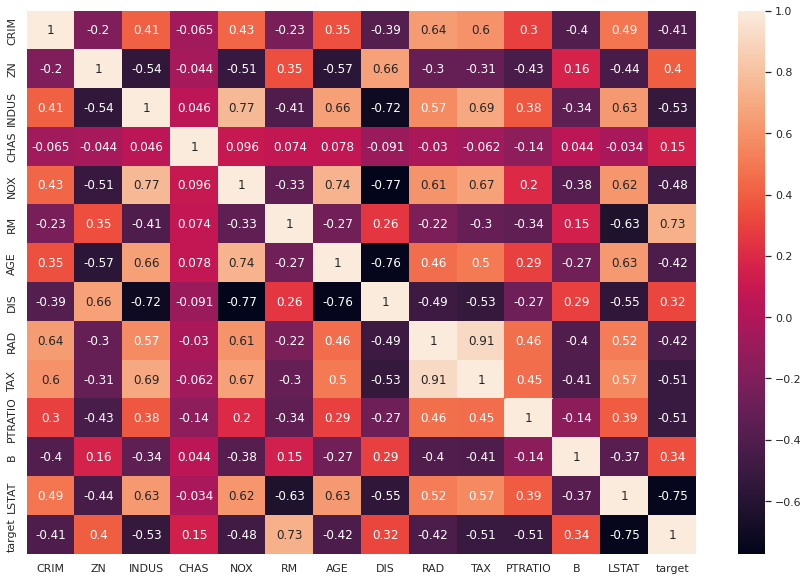

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data = corr,annot = True)
plt.show()

In [29]:
selected_columns = ['CRIM','INDUS','NOX','RM','TAX','PTRATIO','LSTAT']


In [30]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

CRIM  INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0  10.67180  18.10  0.740  6.459  666.0     20.2  23.98
1   0.04741  11.93  0.573  6.030  273.0     21.0   7.88
2   4.83567  18.10  0.583  5.905  666.0     20.2  11.45
3   0.02498   1.89  0.518  6.540  422.0     15.9   8.65
4   0.19133   5.86  0.431  5.605  330.0     19.1  18.46

# 11. Conclusion

why do we have to do regularization?


Sometimes what happens is that our Machine learning model performs well on the training data but does not perform well on the unseen or test data. It means the model is not able to predict the output or target column for the unseen data by introducing noise in the output, and hence the model is called an overfitted model.
So, to deal with the problem of overfitting we take the help of regularization techniques.

Difference between two type of regularization?

Key Differences between Ridge and Lasso Regression

Ridge regression helps us to reduce only the overfitting in the model while keeping all the features present in the model. It reduces the complexity of the model by shrinking the coefficients whereas Lasso regression helps in reducing the problem of overfitting in the model as well as automatic feature selection

Lasso Regression tends to make coefficients to absolute zero whereas Ridge regression never sets the value of coefficient to absolute zero.


Why lasso don't have to apply feature selection?








The idea of using Lasso regression for feature selection purposes is very simple: we fit a Lasso regression on a scaled version of our dataset and we consider only those features that have a coefficient different from 0.

Trying to minimize the cost function, Lasso regression will automatically select those features that are useful, discarding the useless or redundant features. In Lasso regression, discarding a feature will make its coefficient equal to 0. Whereby it don't have to apply feature selection manually.